# Simulating a Mortgage Loan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead https://pypi.org/project/numpy-financial/
* This is added back by InteractiveShellApp.init_path()

In [2]:
# !pip install numpy_financial

In [3]:
import numpy_financial as npf

## Mortgage Basics

### Taking out a mortgage loan
You're expecting a child soon, and its time to start looking for a home.

You're currently living out of an apartment in New York City, but your blossoming career as a Data Scientist has allowed you to save up a sizable sum and purchase a home in neighboring Hoboken, New Jersey.

You have decided to purchase a beautiful brownstone home in the $800,000 range. While you do have a considerable amount of cash on hand, you don't have enough to purchase the entire home outright, which means you will have to take the remaining balance out as a mortgage loan. From the sound of it, you'll have to put about 20% down up-front to a mortgage loan of that size.

This up-front payment is known as a down payment.

In [4]:
# Set the value of the home you are looking to buy
home_value = 800000

# What percentage are you paying up-front?
down_payment_percent = 0.2

# Set the mortgage rate
mortgage_rate = 0.0375

# Set number of years of loan
years = 30

# Set payment schedule (monthly)
schedule = 12

### Calculating the monthly mortgage payment
In order to make sure you can afford the home, you will have to calculate the monthly mortgage payment you will have to make on a loan that size.

Now, since you will be paying a monthly mortgage, you will have to convert each of the parameters into their monthly equivalents. Be careful when adjusting the interest rate, which is compounding!

In order to calculate the monthly mortgage payment, you will use the numpy function .pmt(rate, nper, pv) where:

* rate = The periodic (monthly) interest rate
* nper = The number of payment periods (months) in the lifespan of the mortgage loan
* pv = The total value of the mortgage loan

In [5]:
# Calculate the dollar value of the down payment
down_payment = home_value * down_payment_percent
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value - down_payment
print("Mortgage Loan: " + str(mortgage_loan))

# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = ((1+mortgage_rate)**(1/schedule) - 1)

# How many monthly payment periods will there be over 30 years?
mortgage_payment_periods = schedule*years

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*npf.pmt(rate=mortgage_rate_periodic, nper=mortgage_payment_periods, pv=mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Initial Down Payment: 160000.0
Mortgage Loan: 640000.0
Monthly Mortgage Payment: 2941.13


## Amortization, Interest and Principal Payments

### Calculating interest and principal payments
Due to the size of the mortgage loan, you begin the mortgage in the initial period by paying mostly interest and retaining very little principal, or equity that goes towards the ownership of your home.

This means that if you were to stop paying your mortgage and sell your home after only a few years, the bank would actually own most of the home because what you paid was mostly interest, and very little principal.

In [6]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_loan * mortgage_rate_periodic
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 1966.43
Initial Principal Payment: 974.7


### Simulating periodic payments (I)
You have all the tools you'll need to simulate the mortgage payments over time.

Every time a mortgage payment is made, the following payment will have a slightly lower percentage, which is used to pay off interest. This means that more of the remainder will go towards the portion of the home that you own instead of the bank. This is important to determine how much you will gain from selling the home before paying off your mortgage, or to determine when your mortgage is underwater. But more on that later.

You will now write a simple program to calculate the interest and mortgage portions of each payment over time.

In [7]:
# Initialize principal_remaining variable is  as an array of 0's with length equal to the number of payment periods
interest_paid = np.zeros(mortgage_payment_periods)
principal_paid = np.zeros(mortgage_payment_periods)
principal_remaining = np.zeros(mortgage_payment_periods)

# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment-interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = round(previous_principal_remaining,2)
    
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment

In [8]:
for i in range(5):
    print("Interest: ", interest_paid[i], " | Principal: ", principal_paid[i], " | Period: ", i+1)
    
print("---------------------------------------------------------")
    
for i in range(5):
    print("Interest: ", interest_paid[i+355], " | Principal: ", principal_paid[i+355], " | Period: ", i+356)

Interest:  1966.43  | Principal:  974.7  | Period:  1
Interest:  1963.43  | Principal:  977.7  | Period:  2
Interest:  1960.43  | Principal:  980.7  | Period:  3
Interest:  1957.41  | Principal:  983.72  | Period:  4
Interest:  1954.39  | Principal:  986.74  | Period:  5
---------------------------------------------------------
Interest:  44.76  | Principal:  2896.37  | Period:  356
Interest:  35.86  | Principal:  2905.27  | Period:  357
Interest:  26.94  | Principal:  2914.19  | Period:  358
Interest:  17.98  | Principal:  2923.15  | Period:  359
Interest:  9.0  | Principal:  2929.2  | Period:  360


### Simulating periodic payments (II)
You have decided to extend your program from the previous exercise to store the principal and interest payments made at each period, and to plot the results instead of simply printing them.

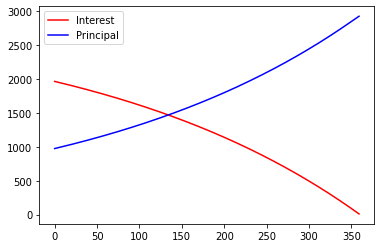

In [9]:
# Plot the interest vs principal
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
plt.legend(['Interest', 'Principal'])
plt.show()

## Home Ownership, Equity and Forecasting

### Cumulative payments and home equity
You are faithfully paying your mortgage each month, but it's difficult to tell how much of the house you actually own and how much interest you have paid in total over the years.

Use np.cumsum() to add up all the interest payments and also to add up all the principal payments over time to see how your ownership changes over time.

Recall that np.cumsum() performs a cumulative sum over time. Return a series of iterative sums instead of just a single number.

In [10]:
# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)

In [11]:
for i in range(5):
    print("Percent Owned: ", round(cumulative_percent_owned[i], 4), " | Period: ", i+1)
    
print("---------------------------------------------------------")
    
for i in range(5):
    print("Percent Owned: ", round(cumulative_percent_owned[i+355], 4), " | Period: ", i+356)

Percent Owned:  0.2012  | Period:  1
Percent Owned:  0.2024  | Period:  2
Percent Owned:  0.2037  | Period:  3
Percent Owned:  0.2049  | Period:  4
Percent Owned:  0.2061  | Period:  5
---------------------------------------------------------
Percent Owned:  0.9854  | Period:  356
Percent Owned:  0.989  | Period:  357
Percent Owned:  0.9927  | Period:  358
Percent Owned:  0.9963  | Period:  359
Percent Owned:  1.0  | Period:  360


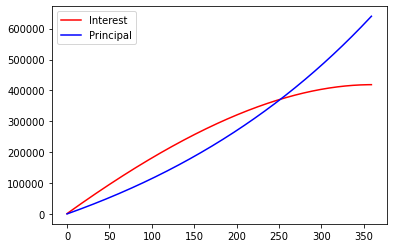

In [12]:
# Plot the cumulative interest paid vs equity accumulated
plt.plot(cumulative_interest_paid, color='red')
plt.plot(cumulative_home_equity, color='blue')
plt.legend(['Interest', 'Principal'])
plt.show()

### Rising housing prices
Home values have been rising steadily each year, and this is a rather large investment for you.

Calculate your home equity value over time given a steady growth rate of 0.25% per month. A repeated array of this growth rate (with a length equal to the number of mortgage payment periods) is already stored for you in an object called growth_array.

In [13]:
# Set yearly growth percent
growth_percent = 0.0025

growth_array = np.zeros(mortgage_payment_periods) + growth_percent

In [14]:
# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1 + growth_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = home_value_forecast * cumulative_percent_owned

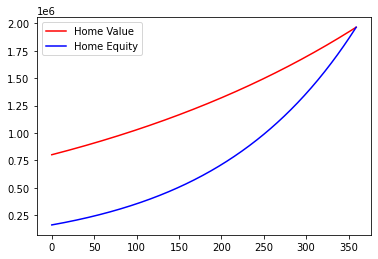

In [15]:
# Plot the home value vs equity accumulated
plt.plot(home_value_forecast, color='red')
plt.plot(cumulative_home_value_owned, color='blue')
plt.legend(['Home Value', 'Home Equity'])
plt.show()

### Falling housing prices and underwater mortgages
Unfortunately, you are also well aware that home prices don't always rise.

An underwater mortgage is when the remaining amount you owe on your mortgage is actually higher than the value of the house itself.

In this exercise, you will calculate the worst case scenario where home prices drop steadily at the rate of 0.45% per month. To speed things up, the cumulative drop in home prices has already been forecasted and stored for you in a variable called cumulative_decline_forecast, which is an array of multiplicative discount factors compared to today's price - no need to add 1 to the rate array.

In [16]:
# Set yearly decline percent
decline_percent = -0.0045

decline_array = np.zeros(mortgage_payment_periods) + decline_percent

In [17]:
# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1+decline_array)
 
# Forecast the home value over time
home_value_forecast = home_value * cumulative_decline_forecast
 
# Find all periods where your mortgage is underwater
underwater = home_value_forecast < principal_remaining
pd.value_counts(underwater)

True     180
False    180
dtype: int64

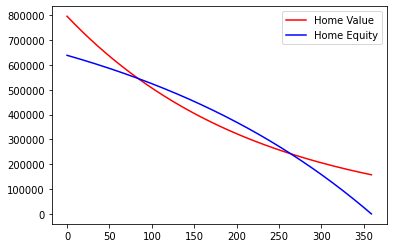

In [18]:
# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
plt.legend(['Home Value', 'Home Equity'])
plt.show()